In [1]:
# 1.0 Initialize


# 1.1 Import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# 1.2 Read data set
data = pd.read_csv('../datasets/stroke.csv')
df = pd.DataFrame(data)

In [2]:
# 2.0 Data Information

In [3]:
# 2.1 Top 5 rows of the table
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
# 2.2 Bottom 5 rows of the table
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [5]:
# 2.3 Table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# 3.0 Data Cleaning Process

In [7]:
# 3.1 Verfify that all the table contents are unique

# gender - 3
# hypertension - 2
# heart_disease - 2
# ever_married - 2
# work_type - 5
# Residence_type - 2
# smoking_status - 4
# stroke - 2

df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
# 3.2 Drop ID column
df.drop(columns=['id'], inplace=True)

In [9]:
# 3.3 Remove any duplicate rows
df.drop_duplicates(keep=False,inplace=True)

In [10]:
# 3.4 Fill NaN values will mean value

# Some bmi values are NaN
# Remove the ones where stroke is 1 as we don't want to account missing data
df[df['stroke'] == 1 & df['bmi'].isna()]

# Replace remaining NaN with value()
df['bmi'].fillna(np.round(df['bmi'].mean(), 1), inplace=True)


In [11]:
# 3.5 Remove gender 'Other'

# We have three gender values
# The count of Other is only one so we can remove it
len(df[df['gender'] == 'Other'])

df = df[df['gender'] != 'Other']

In [12]:
# 4.0 Table Statisctics
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5109.000000   5109.000000    5109.000000        5109.000000   
mean     43.229986      0.097475       0.054022         106.140399   
std      22.613575      0.296633       0.226084          45.285004   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.240000   
50%      45.000000      0.000000       0.000000          91.880000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5109.000000  5109.000000  
mean     28.894774     0.048738  
std       7.698235     0.215340  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000

In [13]:
# 5.0 Rename labels for better visulization

# 5.1 Rename Hypertension
df['hypertension'] = df.hypertension.replace({0: "No Hypertension", 1: "Hypertension"})

# 5.2 Rename Heart Disease
df['heart_disease'] = df.heart_disease.replace({0: "No Heart Disease", 1: "Heart Disease"})

# 5.3 Rename Stroke
df['stroke'] = df.stroke.replace({0: "No Stroke", 1: "Stroke"})

# 5.4 Display the update table
df.head()

gender   age     hypertension     heart_disease ever_married  \
0    Male  67.0  No Hypertension     Heart Disease          Yes   
1  Female  61.0  No Hypertension  No Heart Disease          Yes   
2    Male  80.0  No Hypertension     Heart Disease          Yes   
3  Female  49.0  No Hypertension  No Heart Disease          Yes   
4  Female  79.0     Hypertension  No Heart Disease          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.9     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0  Stroke  
1  Stroke  
2  Stroke  
3  Stroke  
4  Stroke

In [14]:
# 6.0 Outliners

Text(0.5, 1.0, 'Stroke to age outliner plot')

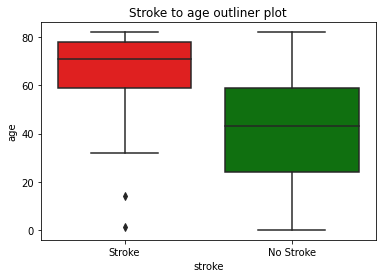

In [15]:
# 6.1 stroke and age
sns.boxplot(x='stroke', y='age', data=df, palette=('red','green'))
plt.title("Stroke to age outliner plot")

Text(0.5, 1.0, 'Stroke to Average glucose level outliner plot')

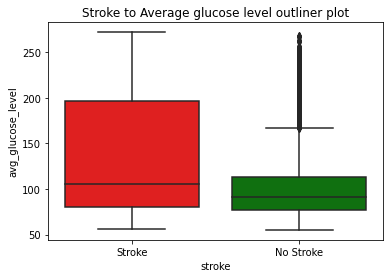

In [16]:
# 6.2 stroke and Average glucose level 
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette=('red','green'))
plt.title("Stroke to Average glucose level outliner plot")

Text(0.5, 1.0, 'Stroke to bmi outliner plot')

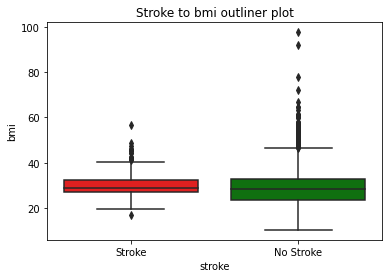

In [17]:
# 6.3 stroke and bmi 
sns.boxplot(x='stroke', y='bmi', data=df, palette=('red','green'))
plt.title("Stroke to bmi outliner plot")

In [18]:
# 7.0 Visualizing data

Text(0.5, 1.0, 'Age Distribution')

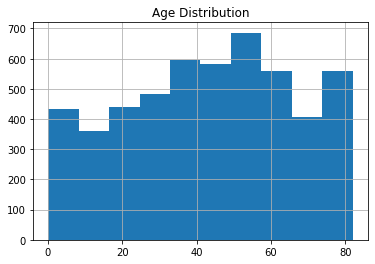

In [19]:
# 7.1 Age Distribution
df['age'].hist().plot()
plt.title("Age Distribution")

Text(0.5, 1.0, 'Average Glucose Level')

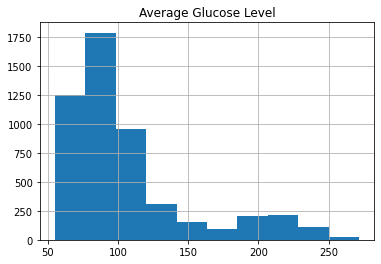

In [20]:
# 7.2 Age Distribution
df['avg_glucose_level'].hist().plot()
plt.title("Average Glucose Level")

Text(0.5, 1.0, 'BMI Distribution')

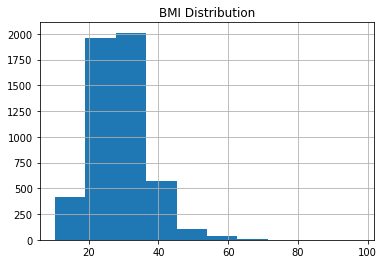

In [21]:
# 7.3 Age Distribution
df['bmi'].hist().plot()
plt.title("BMI Distribution")

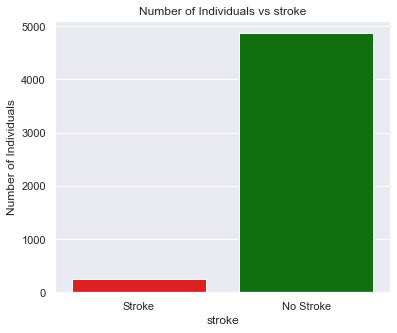

In [22]:
# 7.4 Stroke vs No Stroke
plt.figure(figsize=(6,5)) 
sns.set_theme(style="darkgrid")
sns.countplot(x="stroke", data=df, palette=('red','green'))
plt.title("Number of Individuals vs stroke")
plt.ylabel("Number of Individuals")
plt.show()

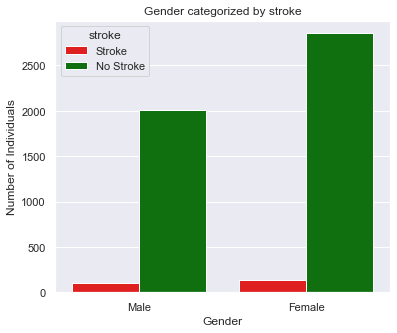

In [23]:
# 7.5 Gender vs Stroke
plt.figure(figsize=(6,5)) 
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", hue="stroke", data=df, palette=('red','green'))
plt.title("Gender categorized by stroke")
plt.ylabel("Number of Individuals")
plt.xlabel("Gender")
plt.show()

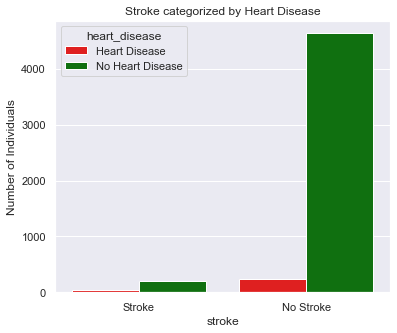

In [24]:
# 7.6 Gender vs Heart Disease
plt.figure(figsize=(6,5)) 
sns.set_theme(style="darkgrid")
sns.countplot(x="stroke", hue="heart_disease", data=df, palette=('red','green'))
plt.title("Stroke categorized by Heart Disease")
plt.ylabel("Number of Individuals")
plt.show()

<Figure size 432x360 with 0 Axes>

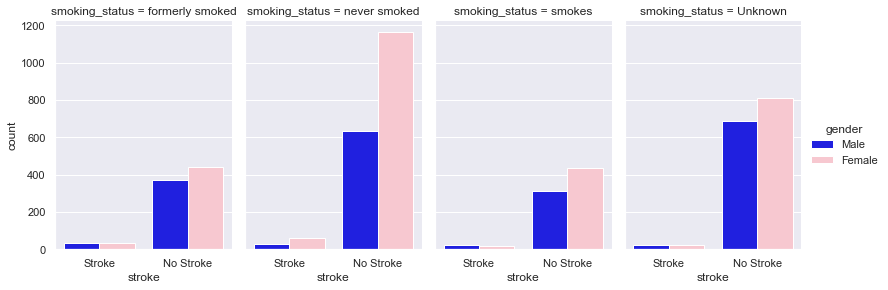

In [25]:
# 7.7 Gender distribution to stroke per smoking status

plt.figure(figsize=(6,5)) 
sns.catplot(x="stroke", hue="gender", col="smoking_status",
                data=df, kind="count",
                height=4, aspect=.7, palette=('blue','pink'))

<Figure size 432x360 with 0 Axes>

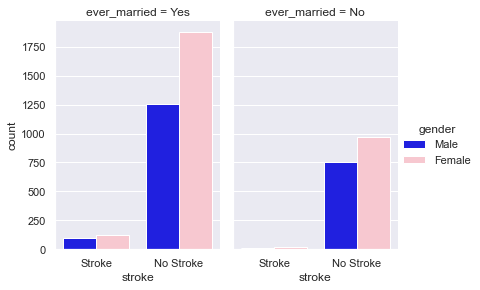

In [26]:
# 7.8 Gender distribution to stroke per marital status

plt.figure(figsize=(6,5)) 
sns.catplot(x="stroke", hue="gender", col="ever_married",
                data=df, kind="count",
                height=4, aspect=.7, palette=('blue','pink'))

<Figure size 432x360 with 0 Axes>

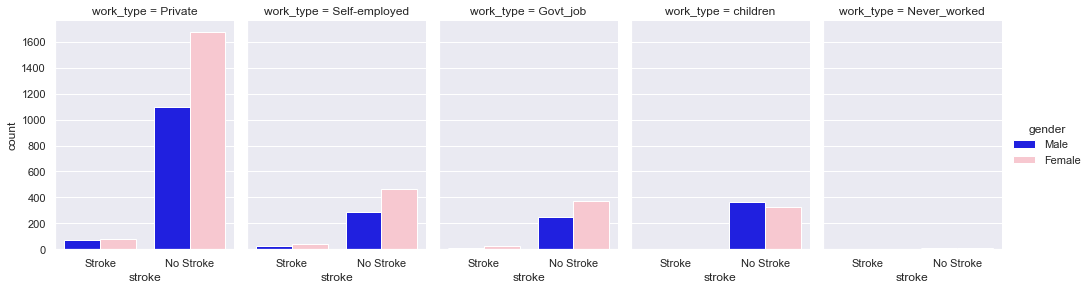

In [27]:
# 7.9 Gender distribution to stroke per work type

plt.figure(figsize=(6,5)) 
sns.catplot(x="stroke", hue="gender", col="work_type",
                data=df, kind="count",
                height=4, aspect=.7, palette=('blue','pink'))

<Figure size 432x360 with 0 Axes>

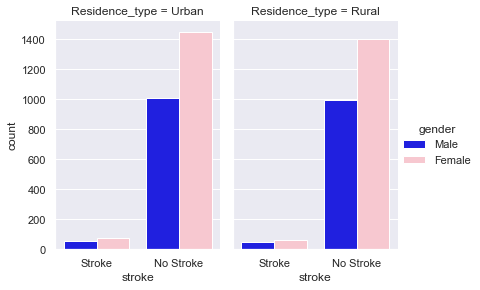

In [28]:
# 7.10 Gender distribution to stroke per residence type

plt.figure(figsize=(6,5)) 
sns.catplot(x="stroke", hue="gender", col="Residence_type",
                data=df, kind="count",
                height=4, aspect=.7, palette=('blue','pink'))

Text(0.5, 0, 'Hypertension')

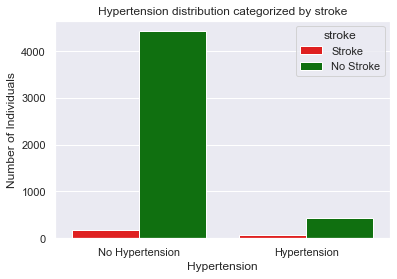

In [29]:
# 7.11 Hypertension distribution count related to stroke
sns.countplot(x='hypertension', hue='stroke', data=df, palette=('red','green'))
plt.title("Hypertension distribution categorized by stroke")
plt.ylabel("Number of Individuals")
plt.xlabel("Hypertension")

Text(0.5, 8.95999999999998, 'Age Distribution')

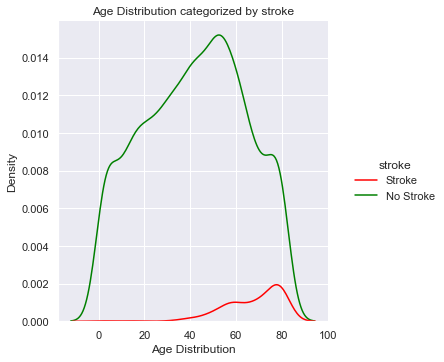

In [30]:
# 7.12 Age Distribution vs Stroke
sns.displot(data=df, x="age", hue="stroke", kind="kde", palette=('red','green'))
plt.title("Age Distribution categorized by stroke")
plt.xlabel("Age Distribution")

Text(0.5, 8.95999999999998, 'Average Glucose Level Distribution')

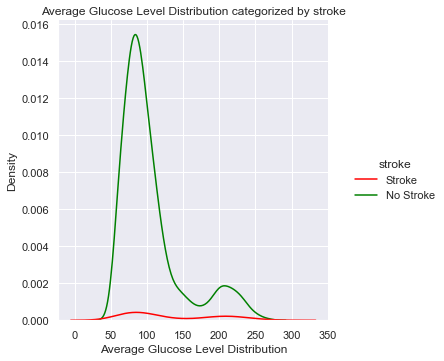

In [31]:
# 7.13 Average Glucose Level Distribution vs Stroke
sns.displot(data=df, x="avg_glucose_level", hue="stroke", kind="kde", palette=('red','green'))
plt.title("Average Glucose Level Distribution categorized by stroke")
plt.xlabel("Average Glucose Level Distribution")

Text(0.5, 8.95999999999998, 'BMI Distribution')

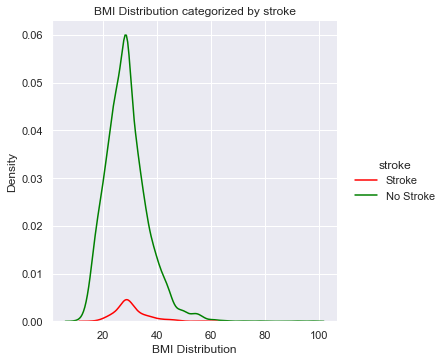

In [32]:
# 7.15 BMI Distribution vs Stroke
sns.displot(data=df, x="bmi", hue="stroke", kind="kde", palette=('red','green'))
plt.title("BMI Distribution categorized by stroke")
plt.xlabel("BMI Distribution")

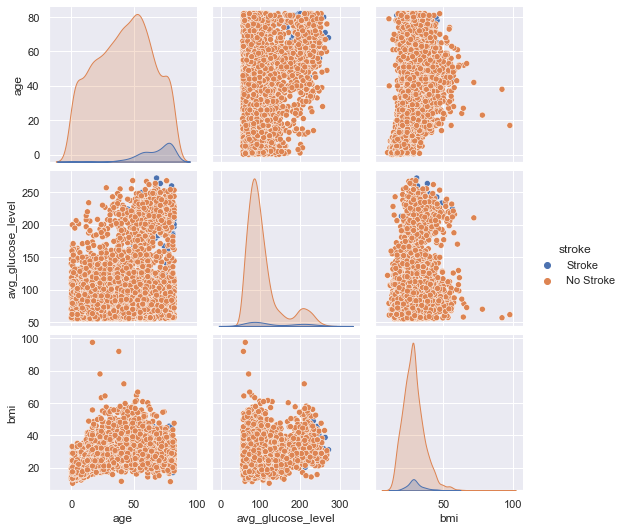

In [33]:
# 7.16 Pair plot
sns.pairplot(data=df,hue='stroke')

Text(0.5, 1.0, 'Heatmap')

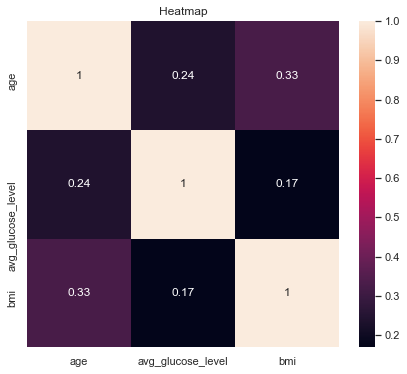

In [34]:
# 7.17 Data Heatmap
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")

In [35]:
# 8.0 Generate report
# profile = ProfileReport(df, title='Stroke Report', explorative=True)
# profile.to_file("../reports/strokeReport.html")